In [4]:
import cfdnetplus
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [33]:

mainfolder='airfoil2d/airFoil_450_mse_adam_newnorm/'
modelfolder='cfdnetplus_models/model_mse_adam_newnorm'

fields= ['U','p','k','omega', 'nut']
xlim =[-50,50]
ylim = [-30 , 30]
xres=256
yres=66
zcut=0.05

In [34]:
# loading the converged solution
folder='airfoil2d/airFoil_450_org/'
label=np.load(folder+'/input.npy')

In [35]:
cfdnetplus.extractInput2d(mainfolder,fields, xlim, ylim,xres,yres,zcut)

airfoil2d/airFoil_450_mse_adam_newnorm/
airFoil_450_mse_0
airFoil_450_mse_20
write airfoil2d/airFoil_450_mse_adam_newnorm//input.npy


In [36]:
data=np.load(mainfolder+'/input.npy')

In [37]:
print(data.shape)
normal=np.max(abs(data),axis=0)
normal=np.max(normal,axis=0)
normal=np.max(normal,axis=0)
print(normal)

(1, 66, 256, 7)
[5.98564209e+02 2.23280396e+02 1.35999908e-13 1.02905297e+05
 1.46129626e+03 2.40107764e+03 5.40818751e-01]


In [38]:
data=data*1/normal

In [39]:

model = tf.keras.models.load_model(modelfolder,compile=False)

In [40]:

prediction=model.predict(data)
prediction=prediction*normal
np.save(mainfolder+'/pred',prediction)
data=data*normal

1/1 [==============================] - 0s 101ms/step


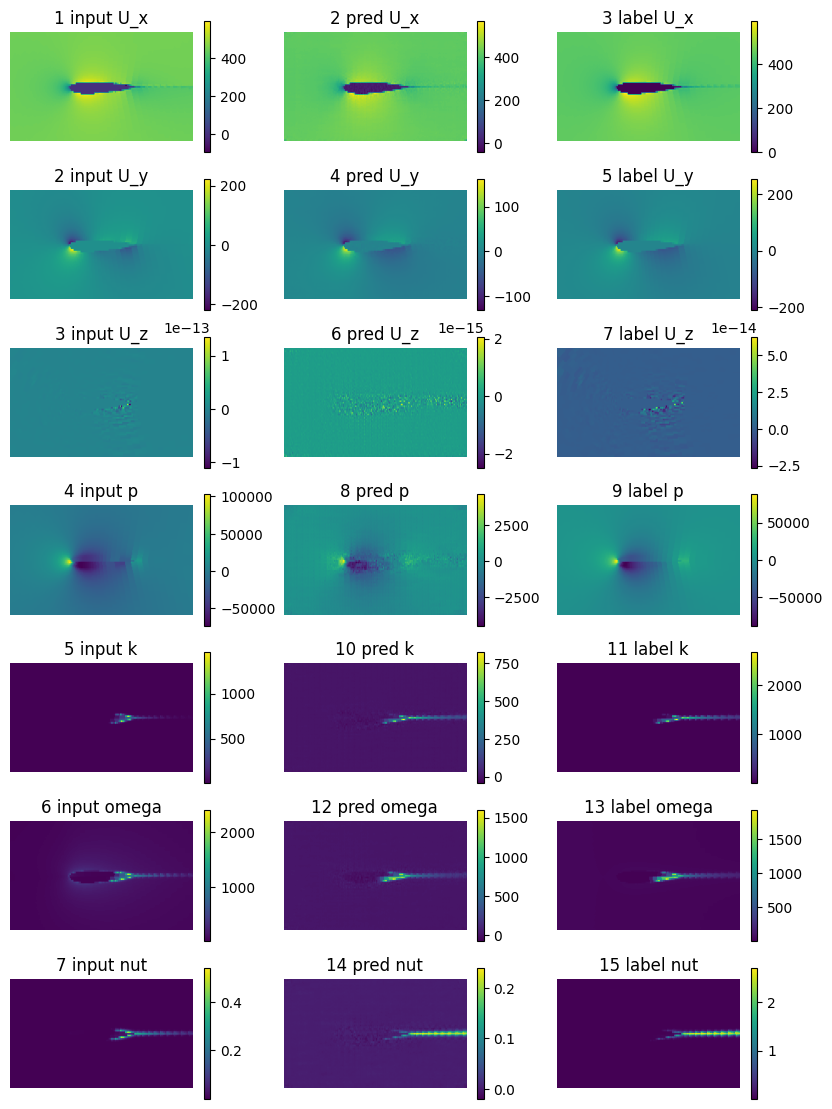

In [41]:
pred=np.load(mainfolder+'/pred.npy')
n=0
fig = plt.figure(figsize=(10, 14))
[a,b,c,d]=data.shape
titles= ['U_x','U_y','U_z','p','k','omega', 'nut']
col=3
for i in range(d):
    fig.add_subplot(d, col, (i*3)+1)
    plt.imshow(data[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title(str((i*1)+1) + ' input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, col, (i*3)+2)
    plt.imshow(pred[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title(str((i*2)+2)+' pred '+titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, col, (i*3)+3)
    plt.imshow(label[n,:,:,i],extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
    plt.title(str((i*2)+3)+' label '+titles[i])
    plt.axis('off')
    plt.colorbar()
    
  

plt.show()

In [43]:
cfdnetplus.pred2OF2D(mainfolder,fields,xlim,ylim)

airFoil_450_mse_0
airFoil_450_mse_adam_newnorm_20
folder airfoil2d/airFoil_450_mse_adam_newnorm//21 was created
write airfoil2d/airFoil_450_mse_adam_newnorm//21/U
write airfoil2d/airFoil_450_mse_adam_newnorm//21/p
write airfoil2d/airFoil_450_mse_adam_newnorm//21/k
write airfoil2d/airFoil_450_mse_adam_newnorm//21/omega
write airfoil2d/airFoil_450_mse_adam_newnorm//21/nut
